<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/09.2-Plot_a_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_distribution.html
*



## Plot a histogram
- using qiskit.visualization.plot_histogram()
- using qiskit.visualization.plot_distribution()


### Using qiskit.visualization.plot_histogram

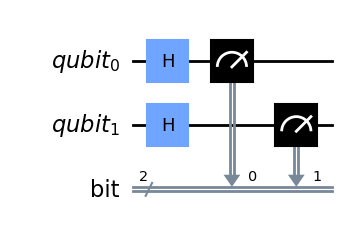

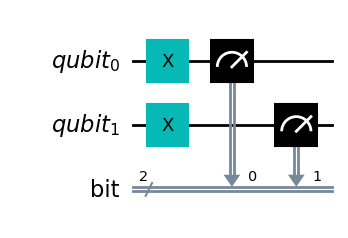

[{'01': 2525, '10': 2494, '00': 2524, '11': 2457}, {'11': 10000}]


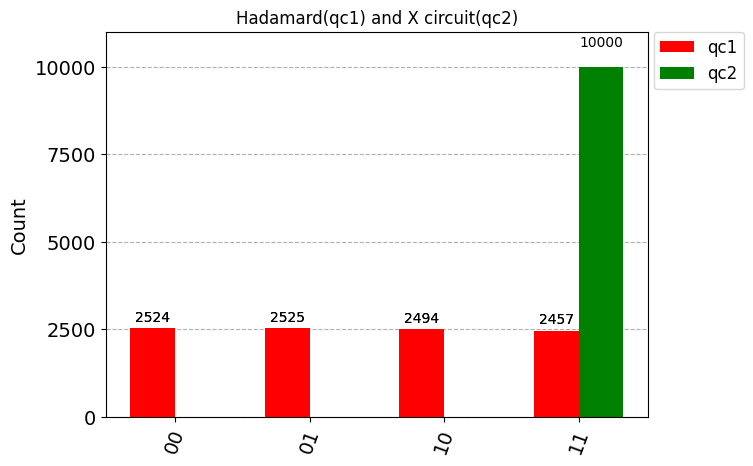

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

#Define the circuit...
qr = QuantumRegister(2, "qubit")
cr = ClassicalRegister(2, "bit")
qc1 = QuantumCircuit(qr, cr)

qc1.h(qr)
qc1.measure(qr, cr)

display(qc1.draw())

qc2= QuantumCircuit(qr, cr)
qc2.x(qr)
qc2.measure(qr,cr)
display(qc2.draw())

#Run the circuit...
provider = IBMProvider(instance="ibm-q/open/main")
backend = provider.get_backend("ibmq_qasm_simulator")

job = backend.run([qc1, qc2], shots=10000)
result = job.result()
count = result.get_counts()
print(count)
plot_histogram(count, figsize=(7,5), legend=["qc1", "qc2"], title="Hadamard(qc1) and X circuit(qc2)", color=["red", "green"])

### Using qiskit.visualization.plot_distribution

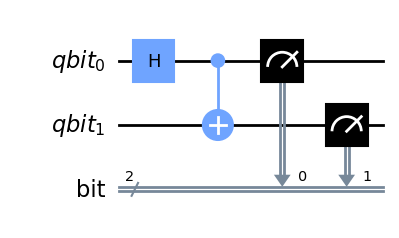

Transpiled circuit...


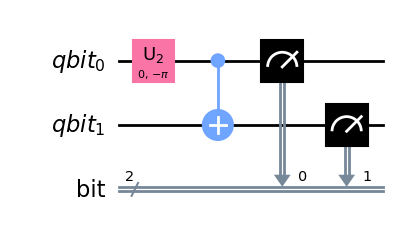

{'11': 7520, '00': 7480}


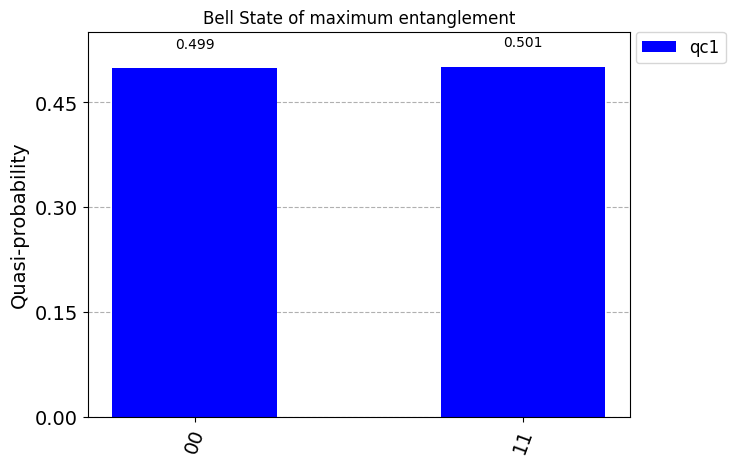

In [ ]:
#Note that ploting distributions DOES NOT show absolute values of counts, but % on top of each bar
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_distribution

#Defining the circuit...
qr = QuantumRegister(2, "qbit")
cr = ClassicalRegister(2, "bit")

qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0], qr[1])

qc.measure(qr, cr)
display(qc.draw())

#Running the simulation...
provider = IBMProvider(instance="ibm-q/open/main")
backend = provider.get_backend("ibmq_qasm_simulator")
qc_trans = transpile(qc, backend=backend)
print("Transpiled circuit...")
display(qc_trans.draw())
job = backend.run(qc, shots=15000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_distribution(counts, legend=["qc1"], title="Bell State of maximum entanglement", color=["blue"])

### Multiple experiments on same histogram using legend

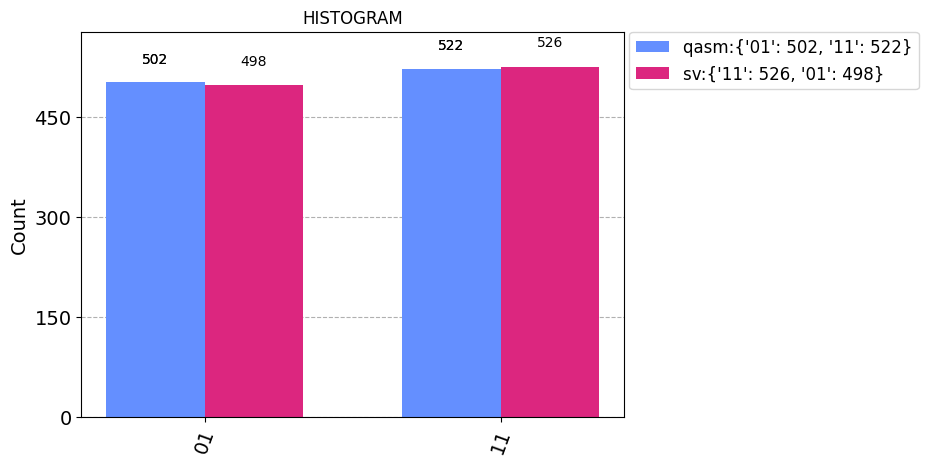

In [12]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(1,0)
qc.h(1)
qc.measure(range(2),range(2))
backend1 = Aer.get_backend('qasm_simulator')
backend2 = Aer.get_backend('statevector_simulator')

result1 = execute(qc, backend1).result()
result2 = execute(qc, backend2).result()

counts1 = result1.get_counts()
counts2 = result.get_counts()

legend = ["qasm:"+str(counts1), "sv:"+str(counts2)]
plot_histogram([counts1,counts2], legend=legend, title = 'HISTOGRAM')

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table